# Analysis & Modeling for all Regions with SMOTE:

In [1]:
# Import libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in data:
df = pd.read_csv('../data/mmALL_073119_csv.csv')

In [3]:
# set display
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...


### EDA of Worldwide Protest Activity:

In [5]:
# Engineer protest duration by total days:

df['years'] = df['endyear'] - df['startyear']
df['months'] = df['endmonth'] - df['startmonth']
df['days'] = df['endday'] - df['startday']
df['total_days'] = df['days'] + (df['months']*30.5) + (df['years']*365)

# including start day for protest duration
df['total_days'] = df['total_days'] + 1

In [6]:
# Create DataFrame for Asia Region:
df = df[df['region'] == 'Asia'].copy()

In [7]:
df['protesterdemand1'].value_counts().head(15)

political behavior, process    1736
labor wage dispute              268
police brutality                259
removal of politician           246
price increases, tax policy     177
land farm issue                 159
social restrictions             139
Name: protesterdemand1, dtype: int64

In [8]:
df.groupby(['protesterdemand1','stateresponse1','protest']).count()

id  country  ccode  \
protesterdemand1            stateresponse1  protest                        
labor wage dispute          accomodation    1         34       34     34   
                            arrests         1         19       19     19   
                            beatings        1         11       11     11   
                            crowd dispersal 1         48       48     48   
                            ignore          1        151      151    151   
                            killings        1          1        1      1   
                            shootings       1          2        2      2   
land farm issue             accomodation    1         26       26     26   
                            arrests         1          8        8      8   
                            beatings        1          5        5      5   
                            crowd dispersal 1         37       37     37   
                            ignore          1         69       69     69   
                            killings        1          7        7      7   
                            shootings       1          6        6      6   
police brutality            accomodation    1         18       18     18   
                            arrests         1         28       28     28   
                            beatings        1         24       24     24   
                            crowd dispersal 1         71       71     71   
                            ignore          1         90       90     90   
                            killings        1         12       12     12   
                            shootings       1         14       14     14   
political behavior, process accomodation    1         99       99     99   
                            arrests         1        168      168    168   
                            beatings        1         76       76     76   
                            crowd dispersal 1        411      411    411   
                            ignore          1        883      883    883   
                            killings        1         45       45     45   
                            shootings       1         52       52     52   
price increases, tax policy accomodation    1         16       16     16   
                            arrests         1         26       26     26   
                            beatings        1          3        3      3   
                            crowd dispersal 1         42       42     42   
                            ignore          1         80       80     80   
                            killings        1          7        7      7   
                            shootings       1          2        2      2   
removal of politician       accomodation    1          6        6      6   
                            arrests         1         17       17     17   
                            beatings        1          9        9      9   
                            crowd dispersal 1         49       49     49   
                            ignore          1        148      148    148   
                            killings        1          8        8      8   
                            shootings       1          9        9      9   
social restrictions         accomodation    1         14       14     14   
                            arrests         1         13       13     13   
                            beatings        1          4        4      4   
                            crowd dispersal 1         22       22     22   
                            ignore          1         76       76     76   
                            killings        1          6        6      6   
                            shootings       1          4        4      4   

                                                     year  region  \
protesterdemand1            stateresponse1  protest                 
labor wage dispute          accomodatio

In [9]:
# View of total protests over entire time period in each region:
region_protests = pd.DataFrame(df.groupby(['region'])['protestnumber'].sum())
region_protests = region_protests.loc[region_protests['protestnumber'] != 0]
region_protests = region_protests.sort_values(by='protestnumber',ascending=False)
region_protests

,protestnumber
region,
Asia,21578


In [10]:
# High concentraion in Yemen
df[df['country'] == 'Yemen'].head(10)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days


In [11]:
# Examine combinations of state response and protester demand
df.groupby(['stateresponse1','protesterdemand1'])['country'].count()

stateresponse1   protesterdemand1           
accomodation     labor wage dispute              34
                 land farm issue                 26
                 police brutality                18
                 political behavior, process     99
                 price increases, tax policy     16
                 removal of politician            6
                 social restrictions             14
arrests          labor wage dispute              19
                 land farm issue                  8
                 police brutality                28
                 political behavior, process    168
                 price increases, tax policy     26
                 removal of politician           17
                 social restrictions             13
beatings         labor wage dispute              11
                 land farm issue                  5
                 police brutality                24
                 political behavior, process     76
                 pr

In [12]:
# Observations where an individual protest duration was over one year
df[df['years'] > 1]

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days
14531,7502014011,India,750,2014,Asia,1,11,3.0,6.0,2014.0,3.0,6.0,2016.0,1.0,"Jawahar Bagh, a public garden in the city of M...",2000-4999,"About 2,000 people",A group that was calling for higher gasoline s...,"political behavior, process","price increases, tax policy",NaN,NaN,crowd dispersal,killings,shootings,NaN,NaN,NaN,NaN,24 Killed as Armed Protesters Clash With the ...,A fierce battle between the police in northern...,2.0,0.0,0.0,731.0


In [13]:
# Same display where duration is over 1 month:
df[df['months'] > 1].sort_values(by='months',ascending=False).head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days
13444,7052011001,Kazakhstan,705,2011,Asia,1,1,26.0,5.0,2011.0,19.0,12.0,2011.0,1.0,western Kazakhstan; Zhanaozen and Aktau,NaN,15000,oil and gas workers,labor wage dispute,"political behavior, process",NaN,NaN,arrests,beatings,ignore,shootings,arrests,killings,accomodation,KazMunaigas warns on output. Financial Times...,Strike over wage and union restrictions. Firs...,0.0,7.0,-7.0,207.5
15544,8002001006,Thailand,800,2001,Asia,1,6,16.0,5.0,2001.0,16.0,12.0,2001.0,0.0,Bangkok,NaN,130,villagers,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,"The Nation, December 16, 2001, Long march ope...",Pak Mool and Rasi Salai dams; this was a 750km...,0.0,7.0,0.0,214.5
15883,8162016001,Vietnam,816,2016,Asia,1,1,15.0,4.0,2016.0,2.0,10.0,2016.0,1.0,National Hanoi; Ho Chi Minh City; Ha Tinh pr...,2000-4999,"More than 4,000 people","Affected fishermen, Vietnamese protesters","political behavior, process",NaN,NaN,NaN,arrests,crowd dispersal,beatings,NaN,NaN,NaN,NaN,"Many arrested over VNdead fish protests, The...",Since a devastating fish kill blighted the wat...,0.0,6.0,-13.0,171.0
15865,8162000001,Vietnam,816,2000,Asia,1,1,3.0,7.0,2000.0,15.0,11.0,2000.0,0.0,Ho Chi Minh City,NaN,75,peasants,"political behavior, process",removal of politician,land farm issue,NaN,accomodation,crowd dispersal,NaN,NaN,NaN,NaN,NaN,1 Protest Comes Out of the Shadows in Vietna...,With only bamboo mats to sleep on and plastic ...,0.0,4.0,12.0,135.0
14760,7702014005,Pakistan,770,2014,Asia,1,5,14.0,8.0,2014.0,16.0,12.0,2014.0,1.0,Lahore to Islamabad,>10000,10000s,Imran Khan,removal of politician,NaN,NaN,NaN,crowd dispersal,accomodation,shootings,killings,NaN,NaN,NaN,Opposition in Pakistan Is Drenched but Not Dou...,"? Tens of thousands of opposition supporters,...",0.0,4.0,2.0,125.0


### Barcharts for Visual Analysis of Number of Protests, Duration & Categories:

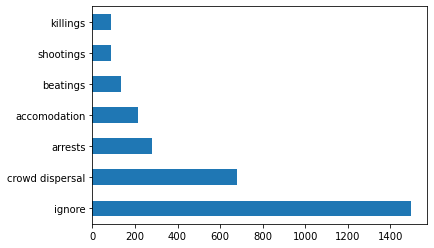

In [14]:
# Value Counts method for categorical features:
df['stateresponse1'].value_counts().plot(kind='barh');

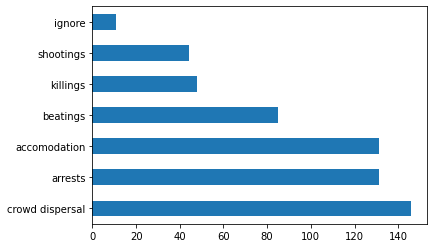

In [15]:
df['stateresponse2'].value_counts().plot(kind='barh');

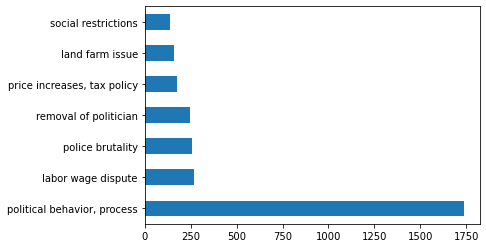

In [16]:
df['protesterdemand1'].value_counts().plot(kind='barh');

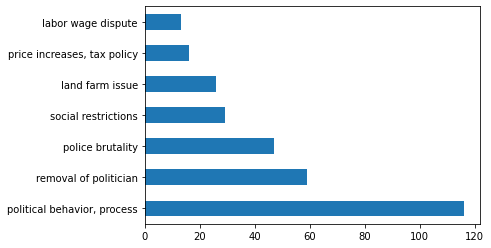

In [17]:
df['protesterdemand2'].value_counts().plot(kind='barh');

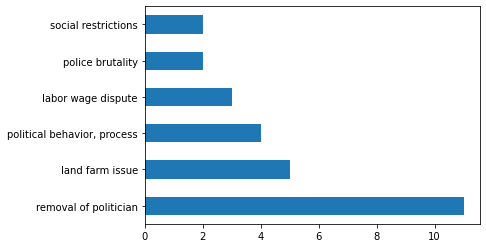

In [18]:
df['protesterdemand3'].value_counts().plot(kind='barh');

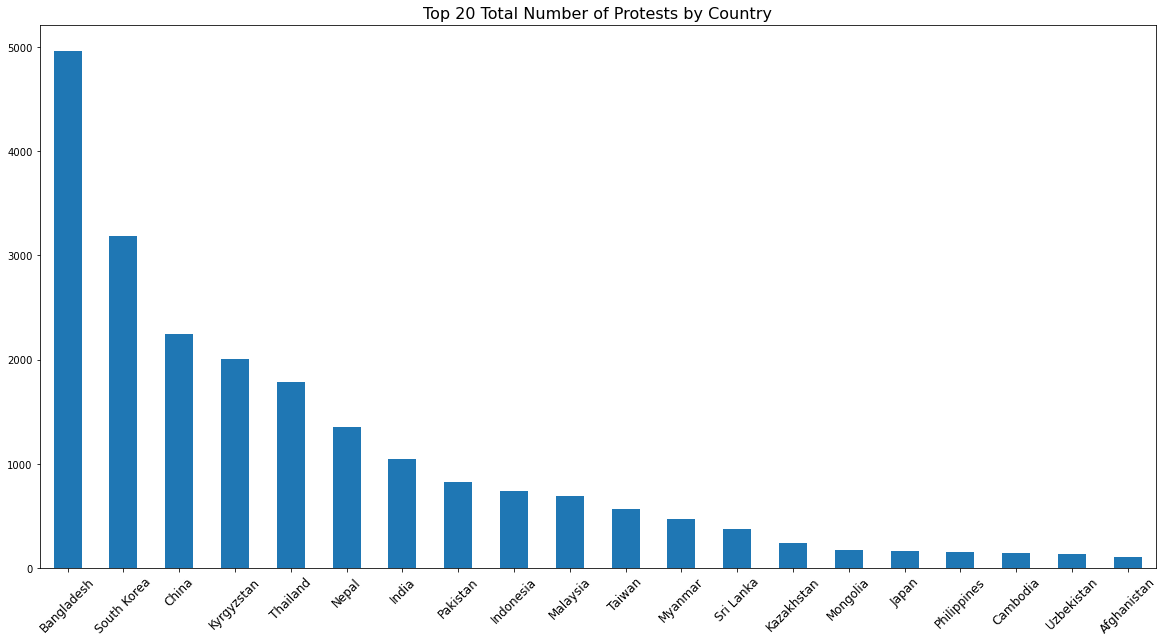

In [19]:
# Examine greatest total number of protests by individual country worldwide:
plt.figure(figsize=(20,10))
df.groupby('country').sum().sort_values(by='protestnumber',ascending=False)['protestnumber'].head(20).plot(kind='bar')
plt.title('Top 20 Total Number of Protests by Country',size=16)
plt.xlabel(None)
plt.xticks(rotation=45,size=12);

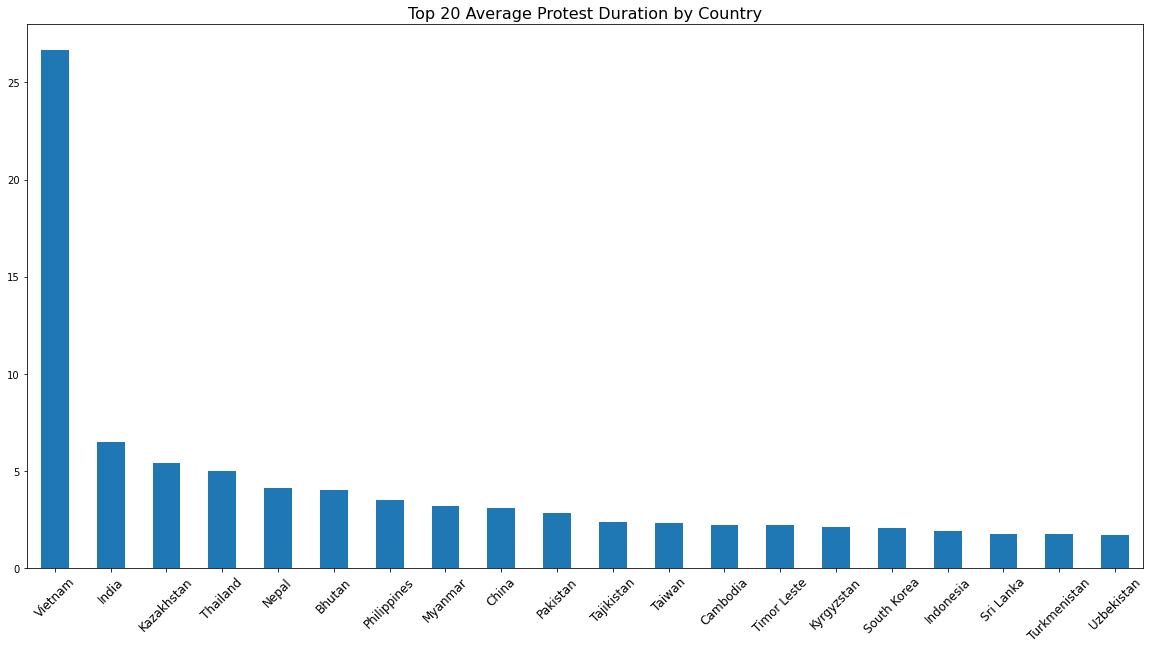

In [20]:
# Same chart with higest average protest duration in days by each individual country.
plt.figure(figsize=(20,10))
df.groupby('country').mean().sort_values(by='total_days',ascending=False)['total_days'].head(20).plot(kind='bar')
plt.title('Top 20 Average Protest Duration by Country',size=16)
plt.xlabel(None)
plt.xticks(rotation=45,size=12);

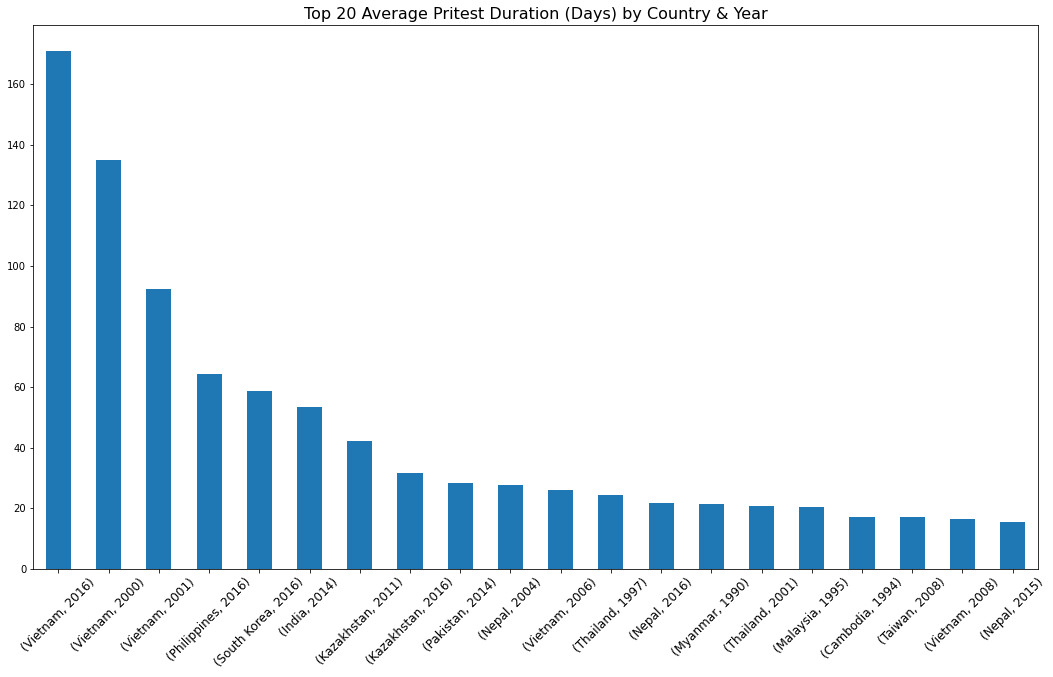

In [21]:
plt.figure(figsize=(18,10))
df.groupby(['country','year'])['total_days'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.title('Top 20 Average Pritest Duration (Days) by Country & Year',size=16)
plt.xlabel(None)
plt.xticks(rotation=45,size=12);

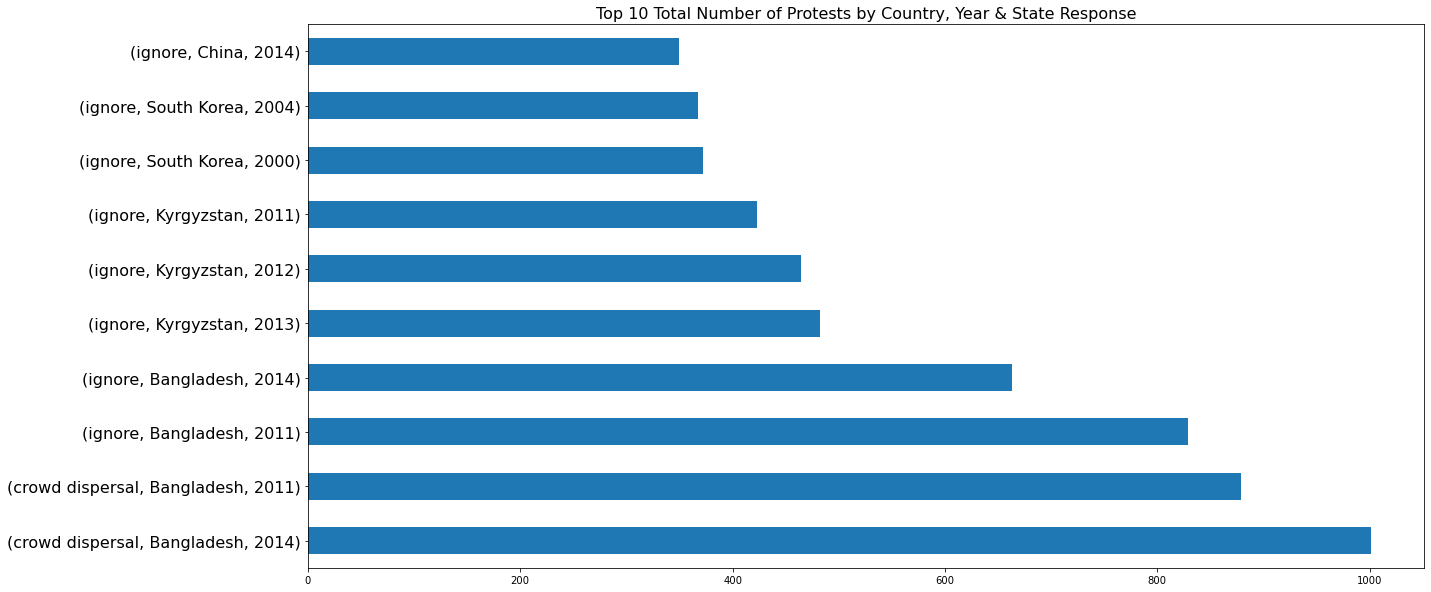

In [22]:
plt.figure(figsize=(20,10))
df.groupby(['stateresponse1','country','year'])['protestnumber'].sum().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Total Number of Protests by Country, Year & State Response',size=16)
plt.ylabel(None)
plt.yticks(size=16);

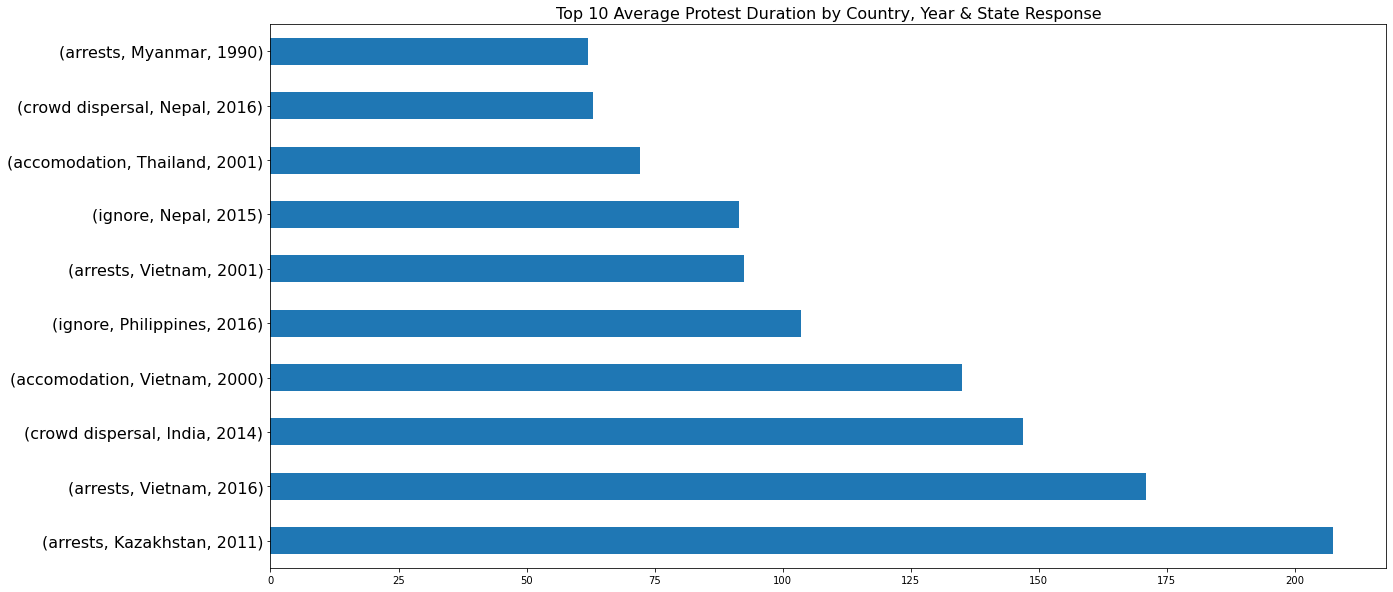

In [23]:
plt.figure(figsize=(20,10))
df.groupby(['stateresponse1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Average Protest Duration by Country, Year & State Response',size=16)
plt.ylabel(None)
plt.yticks(size=16);

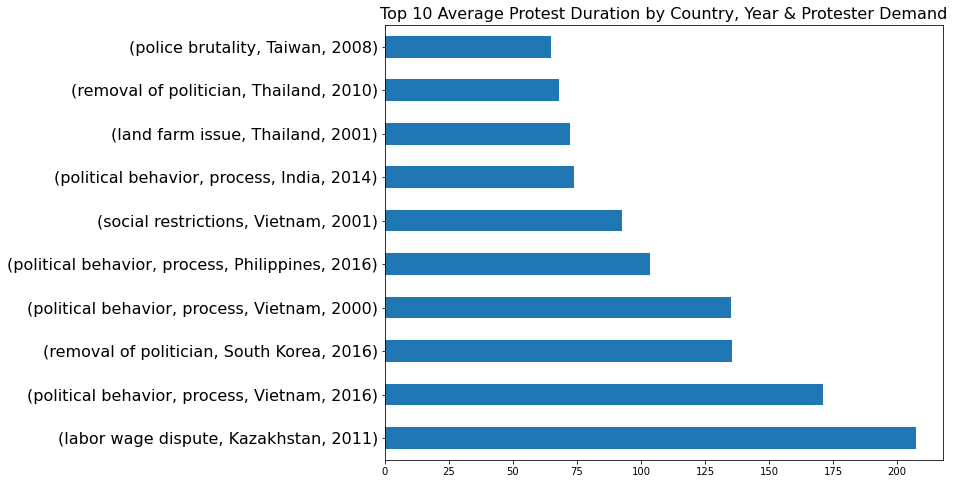

In [24]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Average Protest Duration by Country, Year & Protester Demand',size=16)
plt.ylabel(None)
plt.yticks(size=16);

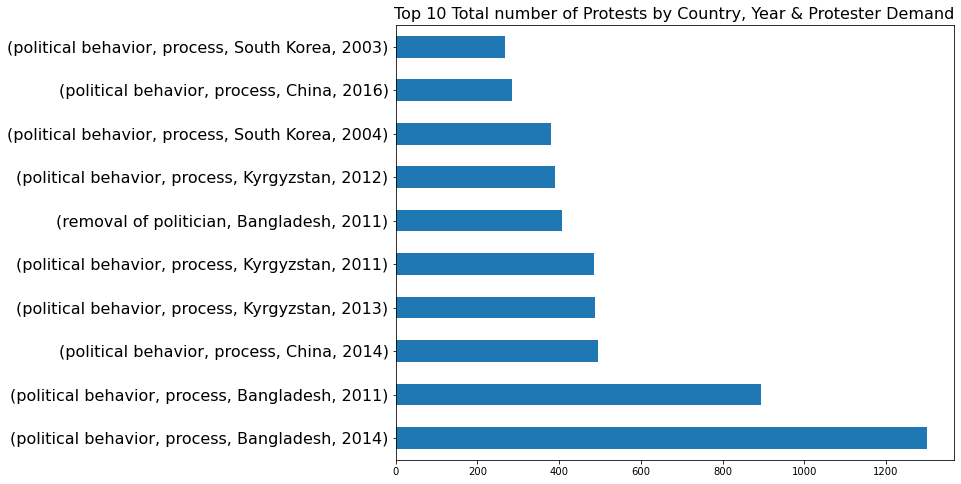

In [25]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','country','year'])['protestnumber'].sum().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Total number of Protests by Country, Year & Protester Demand',size=16)
plt.ylabel(None)
plt.yticks(size=16);

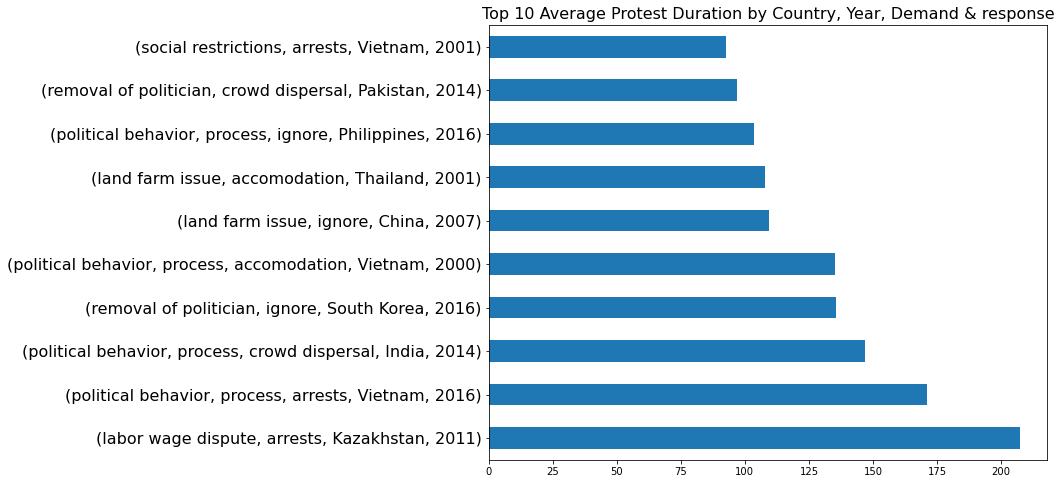

In [26]:
plt.figure(figsize=(10,8))
df.groupby(['protesterdemand1','stateresponse1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.barh()
plt.title('Top 10 Average Protest Duration by Country, Year, Demand & response',size=16)
plt.ylabel(None)
plt.yticks(size=16);

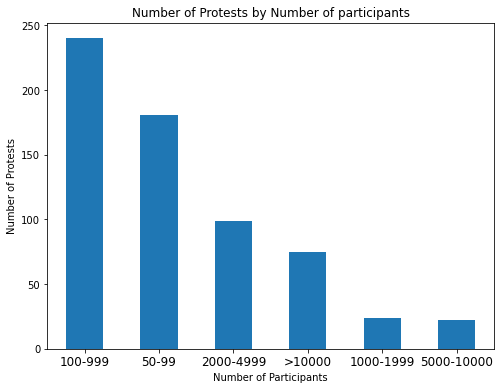

In [27]:
plt.figure(figsize=(8,6))
df['participants_category'].value_counts().plot(kind='bar')
plt.title('Number of Protests by Number of participants')
plt.ylabel('Number of Protests')
plt.xlabel('Number of Participants')
plt.xticks(size=12,rotation=0);

### Processing for Models:

In [28]:
# Examine null values
df.isnull().sum()

id                          0
country                     0
ccode                       0
year                        0
region                      0
protest                     0
protestnumber               0
startday                  313
startmonth                313
startyear                 313
endday                    313
endmonth                  313
endyear                   313
protesterviolence          92
location                  320
participants_category    2659
participants               92
protesteridentity         447
protesterdemand1          316
protesterdemand2         2994
protesterdemand3         3273
protesterdemand4         3178
stateresponse1            321
stateresponse2           2704
stateresponse3           3134
stateresponse4           3267
stateresponse5           3169
stateresponse6           3297
stateresponse7           3156
sources                   313
notes                     343
years                     313
months                    313
days      

In [29]:
# Combine all distinct response and demand features into one feature each
# Credit to Jenn Williamson for Function & Solution

protest_demands = ['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']
state_responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
                   'stateresponse5', 'stateresponse6', 'stateresponse7']

def get_dum_cols(df, list_of_columns):
    list_of_dfs = []
    
    for col in list_of_columns:
        col_df = pd.get_dummies(df[col])
        list_of_dfs.append(col_df)
        
    #combine all df's vertically, so only areas with null values are where a potential column was empty    
    dfs_concat = pd.concat(list_of_dfs, axis = 0).fillna(0)
    
    #convert the concatenated df with all values now filled in into a list of separate dfs - each with all columns
    num_dfs = len(list_of_columns)
    num_rows = len(df)
    list_of_final_dfs = []
    
    for i in range(num_dfs):
        new_df = dfs_concat[num_rows*i : num_rows*(i+1)]
        list_of_final_dfs.append(new_df)
        
    # create combined final df
    final_df = list_of_final_dfs[0]
    
    for j in range(1, len(list_of_final_dfs)):
        final_df += list_of_final_dfs[j]
    return final_df

# Apply above function:
response_cats = get_dum_cols(df,state_responses)
demand_cats = get_dum_cols(df,protest_demands)

# Combine newly arranged response and demand features to original DataFrame:
df = pd.concat([df,demand_cats,response_cats],axis=1)
df = df[df['protest'] == 1].copy()

# Drop irrelevant columns anf fill null values:
df.drop(columns=['id','sources','notes'],inplace=True)
df.fillna(0,inplace=True)

# Binarize target feature
df['accomodation'] = np.where(df['accomodation'] == 1,1,0)

'''These features were also ascertained to not be useful for model predictions 
due to the way they were formatted in the native dataset.'''

remove_features = ['ccode','startyear','endyear','startday',
                   'endday','protest','years','months','days',
                  'participants','protesteridentity','location',
                   'country','endmonth','stateresponse1',
                   'stateresponse2','stateresponse3','stateresponse4',
                   'stateresponse5','stateresponse6','stateresponse7',
                  'protesterdemand1','protesterdemand2',
                'protesterdemand3','protesterdemand4','year']

# Encode features with manageable amounts of categories:
dummy_columns = ['region','startmonth','participants_category']

# Final drop and encoding of features:
df = df.drop(columns=remove_features)
df = pd.get_dummies(df,columns=dummy_columns)

# Removing final null values for target column integrity:
df.dropna(inplace=True)

### Modeling & Analysis:

In [30]:
# Classification & Ensemble Models are among the imports:

# Processing:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Model & Metrics Inventory:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score 

# SMOTE for significantly imbalanced binary classes:
from imblearn.over_sampling import SMOTE

In [31]:
# Arrange X and y arrays:
X = df.drop(columns='accomodation')
y = df['accomodation']

# TTS with stratification of target:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=77)

# Display baseline accuracy:
y.value_counts(normalize=True)

0    0.874791
1    0.125209
Name: accomodation, dtype: float64

In [32]:
# Verify selected features:
X_train.head(1)

,protestnumber,protesterviolence,total_days,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,.,arrests,beatings,crowd dispersal,ignore,killings,shootings,.,region_Asia,startmonth_1.0,startmonth_2.0,startmonth_3.0,startmonth_4.0,startmonth_5.0,startmonth_6.0,startmonth_7.0,startmonth_8.0,startmonth_9.0,startmonth_10.0,startmonth_11.0,startmonth_12.0,participants_category_0,participants_category_100-999,participants_category_1000-1999,participants_category_2000-4999,participants_category_50-99,participants_category_5000-10000,participants_category_>10000
15045,9,0.0,1.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Synthetic rebalancing of classes (Binary) & Modeling:

In [33]:
# Initialize SMOTE object:
smote = SMOTE()

# Rebalance training data for X and y:
Xsm_train, ysm_train = smote.fit_sample(np.array(X_train),np.array(y_train))

In [34]:
# GridSearch for Logistic Regression:
# Note: Model is fit on rebalanced data:

log_params = {'penalty':['l2'],
              'max_iter':[500,1000,1500],
              'C':[0.01,0.3,0.5,1,5]}

logreg = GridSearchCV(LogisticRegression(),
                     log_params,
                     cv=5,
                     verbose=1)

logreg.fit(Xsm_train,ysm_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    9.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.3, 0.5, 1, 5],
                         'max_iter': [500, 1000, 1500], 'penalty': ['l2']},
             verbose=1)

In [35]:
# Compare train and test scores:
logreg.score(Xsm_train,ysm_train), logreg.score(X_test,y_test)

(0.8168367346938775, 0.820615796519411)

In [36]:
# Basic Decision Tree Model:
dtc = DecisionTreeClassifier()
dtc.fit(Xsm_train,ysm_train)

DecisionTreeClassifier()

In [37]:
# Compare scores:
dtc.score(Xsm_train,ysm_train), dtc.score(X_test,y_test)

(0.9956632653061225, 0.891566265060241)

In [38]:
# GridSearch for KNN Model:
knn_params = {'n_neighbors':[3,4,5,6],
             'weights':['uniform','distance'],
             'p':[2,3,4]}

knn = GridSearchCV(KNeighborsClassifier(),
                     knn_params,
                     cv=5,
                     verbose=1)

knn.fit(Xsm_train,ysm_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   14.1s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6], 'p': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [39]:
# Compare scores:
knn.score(Xsm_train,ysm_train), knn.score(X_test,y_test)

(0.9956632653061225, 0.7871485943775101)

In [40]:
# GridSearch for Random Forest:
rfc_params = {'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2'],
             'oob_score':[True,False],
             'ccp_alpha':[0.01,0.05,0.07]}

rfc = GridSearchCV(RandomForestClassifier(),
                     rfc_params,
                     cv=5,
                     verbose=1)

rfc.fit(Xsm_train,ysm_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.01, 0.05, 0.07],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'oob_score': [True, False]},
             verbose=1)

In [41]:
# Compare scores:
rfc.score(Xsm_train,ysm_train), rfc.score(X_test,y_test)

(0.9346938775510204, 0.9196787148594378)

In [42]:
# GridSearch for AdaBoost:

ada_params = {'n_estimators':[40,50,60],
             'learning_rate':[0.5,1,1.5]}

ada = GridSearchCV(AdaBoostClassifier(),
                     ada_params,
                     cv=5,
                     verbose=1)

ada.fit(Xsm_train,ysm_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    7.7s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [40, 50, 60]},
             verbose=1)

In [43]:
# Compare scores:
ada.score(Xsm_train,ysm_train), ada.score(X_test,y_test)

(0.9346938775510204, 0.9196787148594378)

In [44]:
# Model prediction inventory for respective Metrics:
preds_lr = logreg.predict(X_test)
preds_dtc = dtc.predict(X_test)
preds_knn = knn.predict(X_test)
preds_rfc = rfc.predict(X_test)
preds_ada = ada.predict(X_test)

### Metrics:

Logistic Regression precision:  0.38235294117647056
Logistic Regression sensitivity:  0.6914893617021277
Logistic Regression specificity:  0.8392036753445635
Logistic Regression accuracy:  0.820615796519411


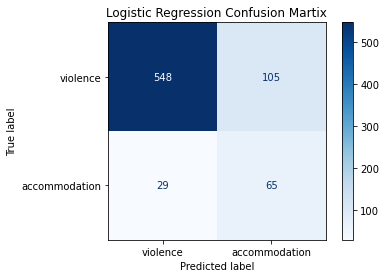

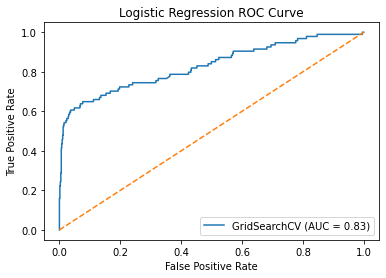

In [45]:
# Produce Metrics - Display Confusion Matrix, Classification Scores & ROC Cruve for each model:

tn, fp, fn, tp = confusion_matrix(y_test,preds_lr).ravel()

plot_confusion_matrix(logreg,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['violence','accommodation'])
plt.title('Logistic Regression Confusion Martix')

print('Logistic Regression precision: ',tp / (tp + fp))
print('Logistic Regression sensitivity: ',tp / (tp + fn))
print('Logistic Regression specificity: ',tn / (tn + fp))
print('Logistic Regression accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(logreg,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Logistic Regression ROC Curve')
plt.legend;

Decision Tree precision:  0.5631067961165048
Decision Tree sensitivity:  0.6170212765957447
Decision Tree specificity:  0.9310872894333844
Decision Tree accuracy:  0.891566265060241


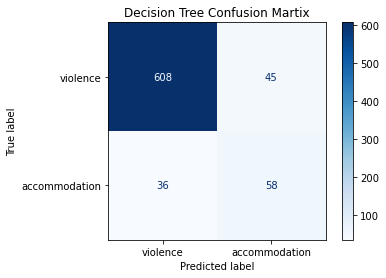

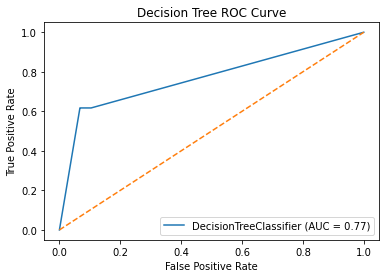

In [46]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_dtc).ravel()

plot_confusion_matrix(dtc,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['violence','accommodation'])
plt.title('Decision Tree Confusion Martix')

print('Decision Tree precision: ',tp / (tp + fp))
print('Decision Tree sensitivity: ',tp / (tp + fn))
print('Decision Tree specificity: ',tn / (tn + fp))
print('Decision Tree accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(dtc,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Decision Tree ROC Curve')
plt.legend;

KNN precision:  0.3142857142857143
KNN sensitivity:  0.5851063829787234
KNN specificity:  0.8162327718223583
KNN accuracy:  0.7871485943775101


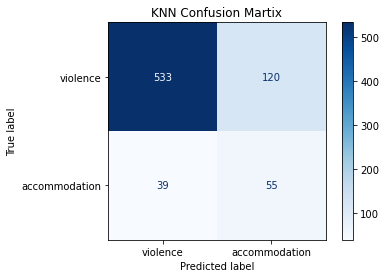

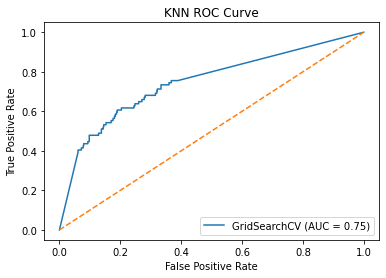

In [47]:
# Random Forest Model appeared to perform the best after classes were rebalanced.
tn, fp, fn, tp = confusion_matrix(y_test,preds_knn).ravel()

plot_confusion_matrix(knn,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['violence','accommodation'])
plt.title('KNN Confusion Martix')

print('KNN precision: ',tp / (tp + fp))
print('KNN sensitivity: ',tp / (tp + fn))
print('KNN specificity: ',tn / (tn + fp))
print('KNN accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(knn,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('KNN ROC Curve')
plt.legend;

Random Forest precision:  0.7428571428571429
Random Forest sensitivity:  0.5531914893617021
Random Forest specificity:  0.9724349157733537
Random Forest accuracy:  0.9196787148594378


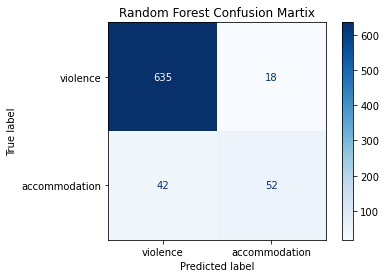

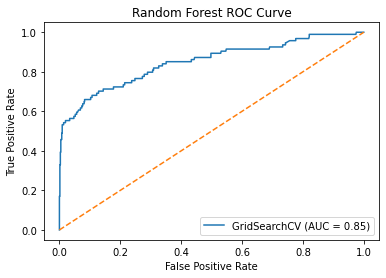

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_rfc).ravel()

plot_confusion_matrix(rfc,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['violence','accommodation'])
plt.title('Random Forest Confusion Martix')

print('Random Forest precision: ',tp / (tp + fp))
print('Random Forest sensitivity: ',tp / (tp + fn))
print('Random Forest specificity: ',tn / (tn + fp))
print('Random Forest accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(rfc,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Random Forest ROC Curve')
plt.legend;

AdaBoost precision:  0.7073170731707317
AdaBoost sensitivity:  0.6170212765957447
AdaBoost specificity:  0.9632465543644717
AdaBoost accuracy:  0.9196787148594378


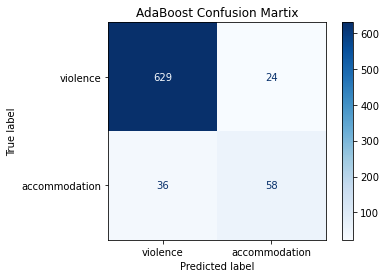

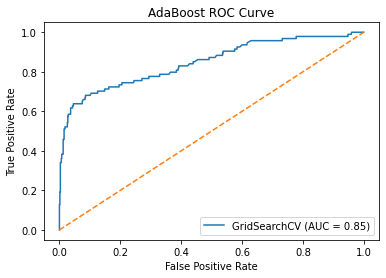

In [49]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_ada).ravel()

plot_confusion_matrix(ada,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['violence','accommodation'])
plt.title('AdaBoost Confusion Martix')

print('AdaBoost precision: ',tp / (tp + fp))
print('AdaBoost sensitivity: ',tp / (tp + fn))
print('AdaBoost specificity: ',tn / (tn + fp))
print('AdaBoost accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(ada,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('AdaBoost ROC Curve')
plt.legend;